In [1]:
!pip install ydata-profiling
!pip install gensim
!pip install Optuna
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=030b32d6ee9c1af21a4d9fc56d9c3feb36936164113662e22b5dce12f7604353
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.8 MB/s eta 0:00:00
  Created wheel for se

In [2]:
import os
import numpy as np
import pandas as pd
import ydata_profiling
from ydata_profiling import ProfileReport
import gensim.downloader as api
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import optuna
from optuna.trial import FixedTrial
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from gensim.models import Word2Vec
from IPython.display import HTML
from sentence_transformers import SentenceTransformer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

!cp "/content/drive/MyDrive/Kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive
cp: cannot create regular file '/root/.kaggle/': Not a directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
def load_datasets():
    !kaggle datasets download -d algord/fake-news
    !kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset
    !kaggle datasets download -d saurabhshahane/fake-news-classification
    !unzip fake-news.zip -d fake-news
    !unzip fake-and-real-news-dataset.zip -d fake-and-real-news-dataset
    !unzip fake-news-classification.zip -d fake-news-classification
    df_welfake = pd.read_csv('/content/fake-news-classification/WELFake_Dataset.csv')
    df_fake_and_real_real = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')
    df_fake_and_real_fake = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')
    df_fake_news_net = pd.read_csv('/content/fake-news/FakeNewsNet.csv')
    
    return df_welfake, df_fake_and_real_real, df_fake_and_real_fake, df_fake_news_net

In [5]:
df_welfake, df_fake_and_real_real, df_fake_and_real_fake, df_fake_news_net = load_datasets()

 60% 1.00M/1.68M [00:00<00:00, 1.47MB/s]
100% 1.68M/1.68M [00:00<00:00, 2.19MB/s]
 95% 39.0M/41.0M [00:02<00:00, 30.6MB/s]
100% 41.0M/41.0M [00:02<00:00, 19.2MB/s]
 99% 91.0M/92.1M [00:04<00:00, 26.2MB/s]
100% 92.1M/92.1M [00:04<00:00, 23.1MB/s]
Archive:  fake-news.zip
  inflating: fake-news/FakeNewsNet.csv  
Archive:  fake-and-real-news-dataset.zip
  inflating: fake-and-real-news-dataset/Fake.csv  
  inflating: fake-and-real-news-dataset/True.csv  
Archive:  fake-news-classification.zip
  inflating: fake-news-classification/WELFake_Dataset.csv  


In [6]:
def basic_info(df):
  print(f"{df.name} info: \n")
  print(f"{df.info()} \n")
  print(f"{df.name} missing values: \n")
  print(f"{df.isna().sum().sort_values()} \n")
  print(f"Unique values in {df.name}: \n")
  print(f"{df.nunique()} \n")

In [7]:
def check_balance(df, target_column):
    class_counts = df[target_column].value_counts(normalize=True) * 100
    print(f"Class distribution:\n{class_counts}")

In [8]:
check_balance(df_fake_news_net, "real")

Class distribution:
1    75.189688
0    24.810312
Name: real, dtype: float64


In [9]:
def perform_eda(df):
  html_name = df.name
  profile = ProfileReport(df, explorative=True)
  profile.to_file(f"Report_{html_name}_EDA.html")

In [10]:
def open_eda(df):
  html_name = df.name
  display(HTML(f"Report_{html_name}_EDA.html"))

# **df_fake_news_net**

# EDA

In [11]:
df_fake_news_net.name = "df_fake_news_net"

In [12]:
df_fake_news_net

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
...,...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0


In [13]:
basic_info(df_fake_news_net)

df_fake_news_net info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB
None 

df_fake_news_net missing values: 

title              0
tweet_num          0
real               0
news_url         330
source_domain    330
dtype: int64 

Unique values in df_fake_news_net: 

title            21724
news_url         21658
source_domain     2441
tweet_num          825
real                 2
dtype: int64 



In [14]:
perform_eda(df_fake_news_net)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
open_eda(df_fake_news_net)

Number of variables,5
Number of observations,23196
Missing cells,660
Missing cells (%),0.6%
Duplicate rows,122
Duplicate rows (%),0.5%
Total size in memory,8.9 MiB
Average record size in memory,402.2 B
Categorical,4
Numeric,1
Dataset has 122 (0.5%) duplicate rows,Duplicates


<Axes: xlabel='index'>

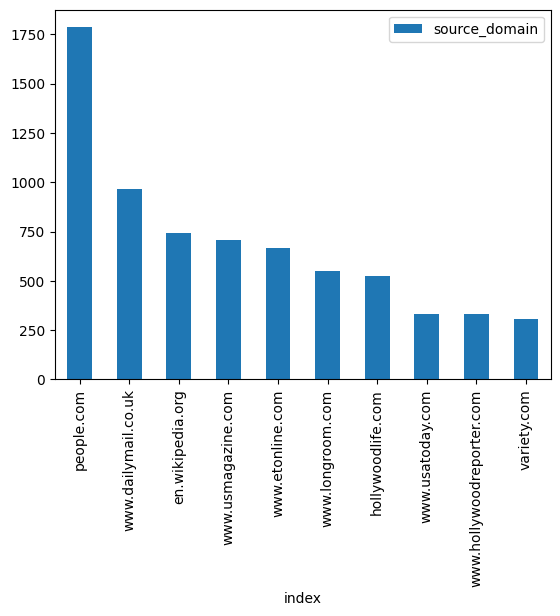

In [16]:
df_source = df_fake_news_net['source_domain'].value_counts(ascending=False).reset_index()
df_source[:10].plot.bar(x='index')

In [17]:
label_counts = df_fake_news_net["real"].value_counts()
print("\nLabel counts:\n", label_counts)
label_counts = df_fake_news_net["real"].value_counts(normalize=True) * 100
print(f"\nLabel counts (%):\n{label_counts}")


Label counts:
 1    17441
0     5755
Name: real, dtype: int64

Label counts (%):
1    75.189688
0    24.810312
Name: real, dtype: float64


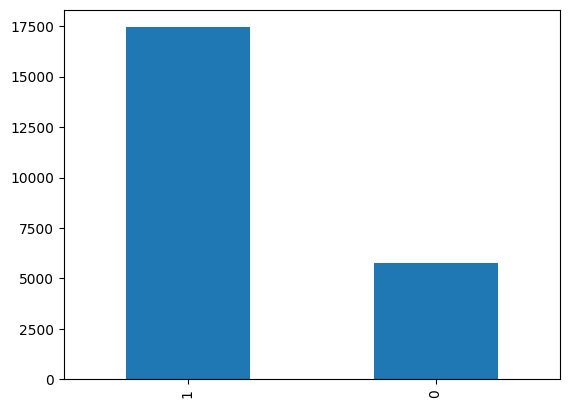

In [18]:
df_fake_news_net['real'].value_counts().plot.bar();

In [19]:
def make_wordcloud(text):
    wordcloud = WordCloud(width=1000, height=1000).generate(text)
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

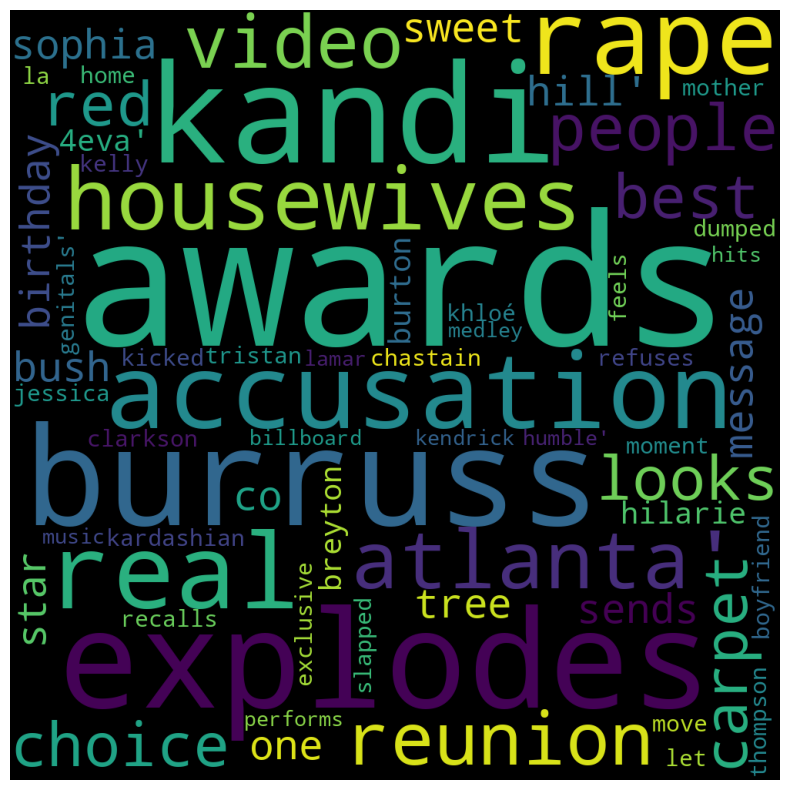

In [20]:
txt = str(df_fake_news_net['title'].values).lower()
make_wordcloud(txt)

# Preprocessing

Since the missing values are in the 'news_url' and 'source_domain' columns and account for a small percentage of the dataset (1.4%), you can simply remove the rows with missing values.

In [21]:
df_fake_news_net = df_fake_news_net.dropna(subset=['news_url', 'source_domain'])

In [22]:
print("df_fake_news_net missing values: \n")
print(df_fake_news_net.isna().sum().sort_values())

df_fake_news_net missing values: 

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64


Remove duplicate rows:



In [23]:
df_fake_news_net.drop_duplicates(subset='title', keep='last', inplace=True)

<ipython-input-23-e976f9fcdd41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_news_net.drop_duplicates(subset='title', keep='last', inplace=True)


In [24]:
print("df_fake_news_net title column duplicates: \n")
df_fake_news_net['title'].duplicated().sum()

df_fake_news_net title column duplicates: 



0

Preprocess TEXT by converting TEXT to lowercase, removing special characters, Tokenize TEXT, remove stopwords and Lemmatization/Stemming.

In [25]:
LEMMATIZER = WordNetLemmatizer()
STEMMER = PorterStemmer()
STOP_WORDS = set(stopwords.words('english'))

In [26]:
def preprocess_text(text, stemming=False):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, digits, and punctuation marks
    text = re.sub(r'\W+|\d+', ' ', text)
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in STOP_WORDS]
    
    # Lemmatize or stem words
    if stemming:
        words = [STEMMER.stem(word) for word in words]
    else:
        words = [LEMMATIZER.lemmatize(word) for word in words]
    
    # Reconstruct the text
    text = ' '.join(words)
    
    return text

In [27]:
# Set stemming to True or False based on your preference
df_fake_news_net['title'] = df_fake_news_net['title'].apply(preprocess_text, stemming=True)

<ipython-input-27-c249b288b5c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_news_net['title'] = df_fake_news_net['title'].apply(preprocess_text, stemming=True)


In [ ]:
# df_fake_news_net['source_domain'] = df_fake_news_net['source_domain'].apply(preprocess_text, stemming=True)

In [28]:
df_fake_news_net

,title,news_url,source_domain,tweet_num,real
0,kandi burruss explod rape accus real housew at...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
2,sophia bush send sweet birthday messag one tre...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,colombian singer maluma spark rumour inappropr...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,gossip girl year later upper east sider shock ...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1
6,broward counti sheriff fire lie parkland,https://yournewswire.com/broward-county-sherif...,yournewswire.com,124,0
...,...,...,...,...,...
23191,pippa middleton wed case miss pippa marri lace...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52,1
23192,zayn malik gigi hadid shock split chanc reunit...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7,0
23193,jessica chastain recal moment mother boyfriend...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26,1
23194,tristan thompson feel dump khloé kardashian re...,www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24,0


## Convert text to vector using Word2Vec or bag-of-words algorithm

### Word2Vec

In [29]:
def load_word2vec_model():
  word2vec_model = api.load("word2vec-google-news-300")
  
  return word2vec_model

In [30]:
word2vec_model = load_word2vec_model()

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [31]:
def bag2vec(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word in word2vec_model]

    if len(words) > 0:
        vec_sum = np.sum(word2vec_model[words], axis=0)
        return vec_sum / len(words)
    else:
        return np.zeros(word2vec_model.vector_size)

In [32]:
df_fake_news_net['title_vec'] = df_fake_news_net['title'].apply(bag2vec)

<ipython-input-32-6a27847fd3bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_news_net['title_vec'] = df_fake_news_net['title'].apply(bag2vec)


In [ ]:
# df_fake_news_net['news_url_vec'] = df_fake_news_net['news_url'].apply(bag2vec)

Some machine learning algorithms expect a fixed number of features, so you may need to unstack the 'title_vec' column into separate feature columns.

In [33]:
def array_to_float(df, column_name):
    # Convert the array column into a new DataFrame
    array_column_df = pd.DataFrame(df[column_name].to_list())

    # Drop the original array column from the main DataFrame
    df = df.drop(column_name, axis=1)

    # Reset the indices of both dataframes
    array_column_df = array_column_df.reset_index(drop=True)
    df = df.reset_index(drop=True)

    # Concatenate the main DataFrame with the new DataFrame
    df = pd.concat([df, array_column_df], axis=1)

    return df

In [34]:
df_fake_news_net = array_to_float(df_fake_news_net, 'title_vec')

In [ ]:
# df_fake_news_net = array_to_float(df_fake_news_net, 'news_url_vec')

### bag-of-words

In [ ]:
df_fake_news_net = df_fake_news_net.rename(columns={'real': 'label'})

# Create a Bag-of-Words representation
vectorizer = CountVectorizer(max_features=300)
X_bow = vectorizer.fit_transform(df_fake_news_net['title']).toarray()

# Replace the 'title' column with the Bag-of-Words representation
X_bow_df = pd.DataFrame(X_bow, columns=vectorizer.get_feature_names_out())
df_fake_news_net = df_fake_news_net.drop(columns=['title'])
X_bow_df = X_bow_df.reset_index(drop=True)
df_fake_news_net = df_fake_news_net.reset_index(drop=True)
df_fake_news_net = pd.concat([df_fake_news_net, X_bow_df], axis=1)

In [ ]:
df_fake_news_net = df_fake_news_net.rename(columns={'real': 'label'})

In [ ]:
def perform_bag_of_words(df, column_names, max_features=300):
    for column in column_names:
        # Create a Bag-of-Words representation
        vectorizer = CountVectorizer(max_features=max_features)
        X_bow = vectorizer.fit_transform(df[column]).toarray()

        # Replace the column with the Bag-of-Words representation
        X_bow_df = pd.DataFrame(X_bow, columns=vectorizer.get_feature_names_out())
        df = df.drop(columns=[column])
        X_bow_df = X_bow_df.reset_index(drop=True)
        df = df.reset_index(drop=True)
        df = pd.concat([df, X_bow_df], axis=1)

    return df

In [ ]:
columns_to_transform = ['title', 'news_url']
df_fake_news_net = perform_bag_of_words(df_fake_news_net, columns_to_transform)

In [ ]:
def get_duplicate_columns(df):
    duplicate_columns = df.columns[df.columns.duplicated()]
    return list(duplicate_columns)

duplicate_columns = get_duplicate_columns(df_fake_news_net)
print(f"Duplicated columns: {duplicate_columns}")

Duplicated columns: ['american', 'angelina', 'aniston', 'bachelor', 'back', 'bella', 'ben', 'best', 'bieber', 'big', 'birthday', 'black', 'blake', 'boyfriend', 'brad', 'carpet', 'cast', 'child', 'co', 'date', 'daughter', 'david', 'day', 'death', 'disick', 'dress', 'ex', 'fashion', 'film', 'first', 'gala', 'game', 'get', 'go', 'gomez', 'gwen', 'hadid', 'harvey', 'hollywood', 'home', 'husband', 'instagram', 'interview', 'jackson', 'jay', 'jenner', 'jessica', 'john', 'justin', 'kardashian', 'kate', 'khloe', 'kim', 'kourtney', 'la', 'life', 'like', 'live', 'look', 'lopez', 'love', 'meghan', 'met', 'middleton', 'miley', 'mom', 'music', 'net', 'new', 'news', 'night', 'one', 'photo', 'pitt', 'pregnant', 'princess', 'real', 'red', 'relationship', 'report', 'royal', 'ryan', 'scott', 'season', 'secret', 'see', 'selena', 'sex', 'sexual', 'shelton', 'show', 'son', 'split', 'star', 'style', 'swift', 'taylor', 'time', 'tom', 'trailer', 'trump', 'tv', 'us', 'video', 'watch', 'west', 'wife', 'world', 

In [ ]:
def remove_duplicate_columns(df):
    df = df.loc[:, ~df.columns.duplicated()]
    return df

df_fake_news_net = remove_duplicate_columns(df_fake_news_net)

In [ ]:
duplicate_columns = get_duplicate_columns(df_fake_news_net)
print(f"Duplicated columns: {duplicate_columns}")

Duplicated columns: []


### Sentence Transformer

In [ ]:
# Load a pre-trained model
model_name = 'paraphrase-distilroberta-base-v1'
sentence_transformer = SentenceTransformer(model_name)

# Generate sentence embeddings for the 'title' column
df_fake_news_net['title_embed'] = df_fake_news_net['title'].apply(lambda x: sentence_transformer.encode(x))

# Convert the embeddings column to separate columns with float values
df_fake_news_net = arrays_to_float(df_fake_news_net, ['title_embed'])

### Perform MinMaxScaler on 'tweet_num'

In [35]:
scaler = MinMaxScaler()

tweet_num_scaled = scaler.fit_transform(df_fake_news_net['tweet_num'].values.reshape(-1, 1))

df_fake_news_net['tweet_num'] = tweet_num_scaled

In [36]:
df_fake_news_net['tweet_num'].sort_values()

17199    0.000000
3399     0.000000
12057    0.000000
9958     0.000000
15418    0.000000
           ...   
16432    0.603854
2999     0.610668
8517     0.728906
19460    0.942085
10323    1.000000
Name: tweet_num, Length: 21398, dtype: float64

### Split Dataset to X and y

In [37]:
# X = df_fake_news_net.drop(['label', 'source_domain'], axis=1) # bag-of-words , 'news_url'
# y = df_fake_news_net['label'] # bag-of-words
X = df_fake_news_net.drop(['title', 'real', 'news_url', 'source_domain'], axis=1) #word2vec X
y = df_fake_news_net['real'] #word2vec X

In [38]:
def split_dataset(X, y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    # First, split the dataset into a train+val subset and a test subset
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Calculate the new ratio for validation size based on train+val subset
    new_val_size = val_size / (train_size + val_size)

    # Split the train+val subset into separate train and validation subsets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=new_val_size, random_state=random_state, stratify=y_train_val)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [39]:
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)

## Training model with PyTorch

In [40]:
class FakeNewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [41]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred.squeeze()

In [42]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

train_dataset = FakeNewsDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [43]:
input_size = X_train.shape[1]
model = LogisticRegression(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [44]:
n_epochs = 10

for epoch in range(n_epochs):
    for data, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")

Epoch [1/10], Loss: 0.8367
Epoch [2/10], Loss: 0.3860
Epoch [3/10], Loss: 0.6825
Epoch [4/10], Loss: 0.2867
Epoch [5/10], Loss: 0.3660
Epoch [6/10], Loss: 0.2032
Epoch [7/10], Loss: 0.1761
Epoch [8/10], Loss: 0.1091
Epoch [9/10], Loss: 1.1309
Epoch [10/10], Loss: 0.8965


In [45]:
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

val_dataset = FakeNewsDataset(X_val_tensor, y_val_tensor)
test_dataset = FakeNewsDataset(X_test_tensor, y_test_tensor)

val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [46]:
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, labels in data_loader:
            outputs = model(data)
            predicted = torch.round(outputs)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [47]:
val_accuracy = evaluate_model(model, val_loader)
test_accuracy = evaluate_model(model, test_loader)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.7854
Test Accuracy: 0.7885


## With Optuna

In [48]:
def train_and_evaluate(X_train, y_train, X_val, y_val, trial, lr, weight_decay, batch_size):
    # Convert the training and validation data to PyTorch tensors and create DataLoaders
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

    train_dataset = FakeNewsDataset(X_train_tensor, y_train_tensor)
    val_dataset = FakeNewsDataset(X_val_tensor, y_val_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Initialize the logistic regression model, loss, and optimizer
    input_size = X_train.shape[1]
    model = LogisticRegression(input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Train the logistic regression model
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        for data, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation dataset
    val_accuracy = evaluate_model(model, val_loader)

    return val_accuracy

In [49]:
def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    weight_decay = trial.suggest_float("weight_decay", 1e-5, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128])

    val_accuracy = train_and_evaluate(X_train, y_train, X_val, y_val, trial, lr, weight_decay, batch_size)
    return val_accuracy


In [50]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, show_progress_bar=True)

[I 2023-05-23 09:47:37,832] A new study created in memory with name: no-name-6ac7a971-8d33-4fda-9677-f184da816fb2
/usr/local/lib/python3.10/dist-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2023-05-23 09:47:43,188] Trial 0 finished with value: 0.7669781931464175 and parameters: {'lr': 0.0005259918105847666, 'weight_decay': 0.0033642487609985, 'batch_size': 64}. Best is trial 0 with value: 0.7669781931464175.
[I 2023-05-23 09:47:56,417] Trial 1 finished with value: 0.7716510903426791 and parameters: {'lr': 0.0025830881984220152, 'weight_decay': 0.002830553765217923, 'batch_size': 32}. Best is trial 1 with value: 0.7716510903426791.
[I 2023-05-23 09:48:08,739] Trial 2 finished with value: 0.7660436137071651 and parameters: {'lr': 5.311358494961748e-05, 'weight_decay': 0.0001948965605468654, 'batch_size': 16}. Best is trial 1 with value: 0.7716510903426791.
[I 2023-05-23 09:48:12,860] Trial 3 finished with value: 0.7738317757009345 and parameters: {'lr': 0.000912499392963915, 'weight_decay': 3.9695468608411784e-05, 'batch_size': 64}. Best is trial 3 with value: 0.7738317757009345.
[I 2023-05-23 09:48:17,157] Trial 4 finished with value: 0.7660436137071651 and parameters: 

In [51]:
best_params = study.best_params
best_val_accuracy = study.best_value

print(f"Best hyperparameters: {best_params}")
print(f"Best validation accuracy: {best_val_accuracy:.4f}")

Best hyperparameters: {'lr': 0.023168250559341852, 'weight_decay': 2.653842348587895e-05, 'batch_size': 32}
Best validation accuracy: 0.7935


In [52]:
def train_and_test_evaluate(X_train, y_train, X_test, y_test, best_params):
    # Convert the training and validation data to PyTorch tensors and create DataLoaders
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

    lr = best_params['lr']
    weight_decay = best_params['weight_decay']
    batch_size = best_params['batch_size']

    train_dataset = FakeNewsDataset(X_train_tensor, y_train_tensor)
    test_dataset = FakeNewsDataset(X_test_tensor, y_test_tensor)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize the logistic regression model, loss, and optimizer
    input_size = X_train.shape[1]
    model = LogisticRegression(input_size)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Train the logistic regression model
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        for data, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation dataset
    test_accuracy = evaluate_model(model, test_loader)

    return test_accuracy

In [53]:
test_accuracy = train_and_test_evaluate(X_train, y_train, X_test, y_test, best_params)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7916


### Evaluate model using k-stratified fold Cross Validation:

---



In [54]:
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds)

accuracies = []

# Use the best hyperparameters found by Optuna
best_params = study.best_params

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate the model on the current fold using the best hyperparameters
    accuracy = train_and_test_evaluate(X_train, y_train, X_test, y_test, best_params)
    accuracies.append(accuracy)

# Calculate and print the average accuracy
average_accuracy = sum(accuracies) / len(accuracies)
print("Average accuracy using k-stratified fold cross-validation:", average_accuracy)


Average accuracy using k-stratified fold cross-validation: 0.7939060353432215


## Artificial Neural Network

In [55]:
print(X_train.shape[1])

301


In [56]:
print(len(np.unique(y_train)))

2


In [57]:
class SimpleANN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [60]:
# Set the input_size, hidden_size, and num_classes according to your dataset
input_size = 301  # The length of your feature vector
hidden_size = 256  # Number of neurons in the hidden layer
num_classes = 2  # Number of classes in your dataset

# Create the model, loss function, and optimizer
model = SimpleANN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 30
for epoch in range(num_epochs):
    # Convert your training data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluate the model on the test set
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
outputs = model(X_test_tensor)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted == y_test_tensor).sum().item()
accuracy = correct / len(y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch [1/30], Loss: 0.7039
Epoch [2/30], Loss: 0.6825
Epoch [3/30], Loss: 0.6630
Epoch [4/30], Loss: 0.6450
Epoch [5/30], Loss: 0.6281
Epoch [6/30], Loss: 0.6124
Epoch [7/30], Loss: 0.5979
Epoch [8/30], Loss: 0.5849
Epoch [9/30], Loss: 0.5737
Epoch [10/30], Loss: 0.5647
Epoch [11/30], Loss: 0.5580
Epoch [12/30], Loss: 0.5537
Epoch [13/30], Loss: 0.5516
Epoch [14/30], Loss: 0.5510
Epoch [15/30], Loss: 0.5514
Epoch [16/30], Loss: 0.5518
Epoch [17/30], Loss: 0.5518
Epoch [18/30], Loss: 0.5508
Epoch [19/30], Loss: 0.5490
Epoch [20/30], Loss: 0.5463
Epoch [21/30], Loss: 0.5432
Epoch [22/30], Loss: 0.5398
Epoch [23/30], Loss: 0.5365
Epoch [24/30], Loss: 0.5334
Epoch [25/30], Loss: 0.5307
Epoch [26/30], Loss: 0.5285
Epoch [27/30], Loss: 0.5267
Epoch [28/30], Loss: 0.5252
Epoch [29/30], Loss: 0.5240
Epoch [30/30], Loss: 0.5229
Test Accuracy: 0.77


In [61]:
def print_classification_report(y_test, y_pred, model_name):
    print(f"{model_name.capitalize()} Classification Report")
    print("*"*30)
    print(classification_report(y_test, y_pred))
    print("*"*30)
    
def print_confusion_matrix(y_test, y_pred, model_name):
    print(f"{model_name.capitalize()} Confusion Matrix")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [62]:
class ANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(hidden_size1) # Batch normalization
        self.dropout1 = nn.Dropout(0.5) # Dropout layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(hidden_size2) # Batch normalization
        self.dropout2 = nn.Dropout(0.5) # Dropout layer
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.bn1(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.bn2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

Epoch [1/100], Loss: 0.8653
Epoch [2/100], Loss: 0.8050
Epoch [3/100], Loss: 0.7815
Epoch [4/100], Loss: 0.7594
Epoch [5/100], Loss: 0.7325
Epoch [6/100], Loss: 0.7270
Epoch [7/100], Loss: 0.7135
Epoch [8/100], Loss: 0.7058
Epoch [9/100], Loss: 0.6942
Epoch [10/100], Loss: 0.6819
Epoch [11/100], Loss: 0.6714
Epoch [12/100], Loss: 0.6715
Epoch [13/100], Loss: 0.6699
Epoch [14/100], Loss: 0.6546
Epoch [15/100], Loss: 0.6534
Epoch [16/100], Loss: 0.6500
Epoch [17/100], Loss: 0.6430
Epoch [18/100], Loss: 0.6374
Epoch [19/100], Loss: 0.6313
Epoch [20/100], Loss: 0.6285
Epoch [21/100], Loss: 0.6216
Epoch [22/100], Loss: 0.6181
Epoch [23/100], Loss: 0.6110
Epoch [24/100], Loss: 0.6068
Epoch [25/100], Loss: 0.6038
Epoch [26/100], Loss: 0.6003
Epoch [27/100], Loss: 0.5937
Epoch [28/100], Loss: 0.5923
Epoch [29/100], Loss: 0.5884
Epoch [30/100], Loss: 0.5799
Epoch [31/100], Loss: 0.5785
Epoch [32/100], Loss: 0.5739
Epoch [33/100], Loss: 0.5745
Epoch [34/100], Loss: 0.5704
Epoch [35/100], Loss: 0

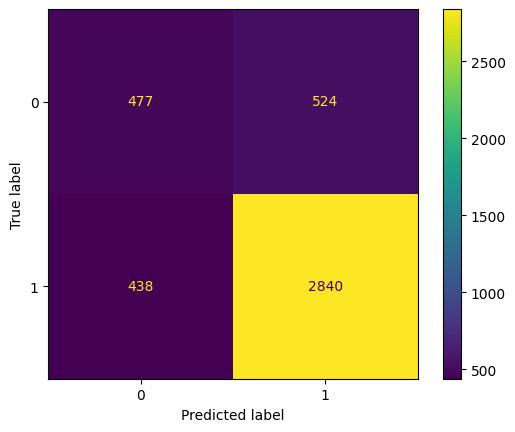

In [66]:
# Adjust the input size, hidden size, and output size based on your dataset and feature extraction method
input_size = 301
hidden_size1 = 256
hidden_size2 = 128
num_classes = 2

model = ANN(input_size, hidden_size1, hidden_size2, num_classes)

# Choose an optimization algorithm and set the learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

# Set the number of epochs for training
num_epochs = 100

# Train the model
for epoch in range(num_epochs):
    # Convert the input and target variables to PyTorch tensors
    inputs = torch.tensor(X_train.values, dtype=torch.float32)
    targets = torch.tensor(y_train.values, dtype=torch.long)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
with torch.no_grad():
    test_inputs = torch.tensor(X_test.values, dtype=torch.float32)
    test_outputs = model(test_inputs)
    _, y_pred = torch.max(test_outputs.data, 1)

test_accuracy = (y_pred.numpy() == y_test.values).mean()

# Print the classification report and confusion matrix
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print_classification_report(y_test, y_pred, "ANN")
print_confusion_matrix(y_test, y_pred, "ANN")
